In [4]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
datagen = ImageDataGenerator(rescale=1.0/255.0 , validation_split=0.2)

In [34]:
dir = 'C:\\Users\\82104\\Desktop\\mit\\indoorCVPR_09\\Images'

In [140]:
train_generator = datagen.flow_from_directory( 
                                                directory=dir,
                                                subset='training',
                                                shuffle=False, batch_size=1  ,target_size=(224, 224)  # suffle false이므로, 고정
                                                )
val_test_generator = datagen.flow_from_directory(
                                                directory=dir,
                                                subset='validation',
                                                shuffle=False, batch_size=1 ,target_size=(224, 224) 
                                                )

Found 12522 images belonging to 67 classes.
Found 3098 images belonging to 67 classes.


In [24]:
 # train 12466, test는 1590, valid 는 1564임.

In [102]:
train_generator.next()[0]

(1, 224, 224, 3)

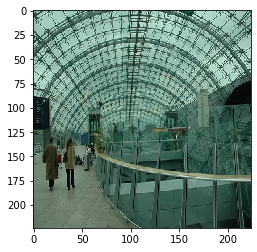

In [122]:
plt.imshow(train_generator.next()[0].reshape(224,224,3))

In [136]:
all = 'C:\\Users\\82104\\Desktop\\mit\\indoorCVPR_09\\Images'
tr = 'C:\\Users\\82104\\Desktop\\mit\\indoorCVPR_09\\train'
temp = 'C:\\Users\\82104\\Desktop\\mit\\indoorCVPR_09\\temp'

val = 'C:\\Users\\82104\\Desktop\\mit\\indoorCVPR_09\\valid'
te = 'C:\\Users\\82104\\Desktop\\mit\\indoorCVPR_09\\test'

In [137]:
# 데이터 쪼개기

def split_dataset_into_test_and_train_sets(all_data_dir, training_data_dir, testing_data_dir, testing_data_pct):
    # Recreate testing and training directories
    if testing_data_dir.count('/') > 1:
        shutil.rmtree(testing_data_dir, ignore_errors=False)
        os.makedirs(testing_data_dir)
        print("Successfully cleaned directory " + testing_data_dir)
    else:
        print("Refusing to delete testing data directory " + testing_data_dir + " as we prevent you from doing stupid things!")

    if training_data_dir.count('/') > 1:
        shutil.rmtree(training_data_dir, ignore_errors=False)
        os.makedirs(training_data_dir)
        print("Successfully cleaned directory " + training_data_dir)
    else:
        print("Refusing to delete testing data directory " + training_data_dir + " as we prevent you from doing stupid things!")

    num_training_files = 0
    num_testing_files = 0

    for subdir, dirs, files in os.walk(all_data_dir):
        category_name = os.path.basename(subdir)

        # Don't create a subdirectory for the root directory
        print(category_name + " vs " + os.path.basename(all_data_dir))
        if category_name == os.path.basename(all_data_dir):
            continue

        training_data_category_dir = training_data_dir + '/' + category_name
        testing_data_category_dir = testing_data_dir + '/' + category_name

        if not os.path.exists(training_data_category_dir):
            os.mkdir(training_data_category_dir)

        if not os.path.exists(testing_data_category_dir):
            os.mkdir(testing_data_category_dir)

        for file in files:
            input_file = os.path.join(subdir, file)
            if np.random.rand(1) < testing_data_pct:
                shutil.copy(input_file, testing_data_dir + '/' + category_name + '/' + file)
                num_testing_files += 1
            else:
                shutil.copy(input_file, training_data_dir + '/' + category_name + '/' + file)
                num_training_files += 1

    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

In [138]:
split_dataset_into_test_and_train_sets(all, tr, temp, 0.2)

Refusing to delete testing data directory C:\Users\82104\Desktop\mit\indoorCVPR_09\temp as we prevent you from doing stupid things!
Refusing to delete testing data directory C:\Users\82104\Desktop\mit\indoorCVPR_09\train as we prevent you from doing stupid things!
Images vs Images
airport_inside vs Images
artstudio vs Images
auditorium vs Images
bakery vs Images
bar vs Images
bathroom vs Images
bedroom vs Images
bookstore vs Images
bowling vs Images
buffet vs Images
casino vs Images
children_room vs Images
church_inside vs Images
classroom vs Images
cloister vs Images
closet vs Images
clothingstore vs Images
computerroom vs Images
concert_hall vs Images
corridor vs Images
deli vs Images
dentaloffice vs Images
dining_room vs Images
elevator vs Images
fastfood_restaurant vs Images
florist vs Images
gameroom vs Images
garage vs Images
greenhouse vs Images
grocerystore vs Images
gym vs Images
hairsalon vs Images
hospitalroom vs Images
inside_bus vs Images
inside_subway vs Images
jewellerys

In [139]:
split_dataset_into_test_and_train_sets(temp, val, te, 0.5)

Refusing to delete testing data directory C:\Users\82104\Desktop\mit\indoorCVPR_09\test as we prevent you from doing stupid things!
Refusing to delete testing data directory C:\Users\82104\Desktop\mit\indoorCVPR_09\valid as we prevent you from doing stupid things!
temp vs temp
airport_inside vs temp
artstudio vs temp
auditorium vs temp
bakery vs temp
bar vs temp
bathroom vs temp
bedroom vs temp
bookstore vs temp
bowling vs temp
buffet vs temp
casino vs temp
children_room vs temp
church_inside vs temp
classroom vs temp
cloister vs temp
closet vs temp
clothingstore vs temp
computerroom vs temp
concert_hall vs temp
corridor vs temp
deli vs temp
dentaloffice vs temp
dining_room vs temp
elevator vs temp
fastfood_restaurant vs temp
florist vs temp
gameroom vs temp
garage vs temp
greenhouse vs temp
grocerystore vs temp
gym vs temp
hairsalon vs temp
hospitalroom vs temp
inside_bus vs temp
inside_subway vs temp
jewelleryshop vs temp
kindergarden vs temp
kitchen vs temp
laboratorywet vs temp
lau